# Brest cancer classification

![separator](img/sep.jpeg)

We will use a basic Machine Learning framework to perform a multilabel classification
    task based on medical examination results performed on patients with and without a
  breast tumour, in order to guess if a tumour is <em>malignant</em> or <em>benign</em>
  
We proceed as follow:

* **Data analysis** - We prepare, study and explore a dataset, highliting important correlations.
* **Model modelling** - we create and train a model to predict a target variable, then we tune the hyper-parameters of our model in order to improve it if possible.
* **Model evaluation and comparison** - we evaluate it using some metrics and compare them to find the best one.  
* **Feature importance** - we highlight the important parameters in predictiong the presence of a cardiovascular disease.
* **Conclusion**.

To work through these topics, we'll use `pandas`, `Matplotlib` and `NumPy` for data anaylsis, as well as, `Scikit-Learn` for machine learning and modelling tasks:

In [ ]:
# Data analysis libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, norm

## Scikit Learn Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Scikit Learn Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Scikit Learn preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Here are some useful functions that we will be using all along:

In [ ]:
# Create a more visual confusion matrix
def conf_mtrx_plot(mtrx) :
    """ Plot confusion matrix using seaborn's heatmap """
    fig, ax = plt.subplots(figsize = (8,8))
    ax = sns.heatmap(data = conf_mtrx,
                     cmap = 'RdPu_r',
                     #fmt = '.2f',
                     robust = True,
                     center = 0,
                     square = True,
                     annot = True)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    return fig

# Create a more ROC curve
def ROC_cur_plot(clf, X_test, y_test):
    ''' Plot a ROC curve of the TPR and FPR'''
    fig, ax = plt.subplots(figsize = (8,8))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    AUC = metrics.auc(fpr,tpr)
    # Plot ROC curve
    fig, ax = plt.subplots(figsize = (6,6))
    plt.plot(fpr, tpr, color=colours[2], label='AUC: {:.2f}'.format(AUC))
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color=colours[4], linestyle='--', label='Guess')
    # Customize the plot
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.style.use('default')
    return fig

# evaluate model on different metrics:
def eval_mod(model, X_test, y_test):
    ''' evaluate a model on y_test'''
    y_preds = model.predict(X_test)
    acc = model.score(X_test, y_test)
    prec = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    dft_eval = {'accuracy' : acc, 
               'precision' : prec, 
                  'recall' : recall, 
                'f1 score' : f1}
    for v, k in dft_eval.items():
        print(v,': {:.2f}%'.format(k * 100))
    return dft_eval

For visibility reasons, I will use the following set of colours : 
<span style='color:#fddad7'>#fddad7</span>, <span style='color:#faa3b6'>#faa3b6</span>, <span style='color:#e7489b'>#e7489b</span>, <span style='color:#9c017c'>#9c017c</span> and <span style='color:#5d006f'>#5d006f</span>

In [ ]:
colours = ['#fddad7', '#faa3b6', '#e7489b', '#9c017c', '#5d006f']

## 1) Data analysis:

The original data is taken from the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) from UCI Machine Learning Repository.

### Data description: 

The rows in the dataset represent the 569 patients and the columns represent 30 characteristics of the cell nuclei present in image of a fine needle aspirate (FNA) of a breast mass. We use the dataset to make a prediction on our target variable:

|    | Features                 | Variable Type       | Variable        | Value Type                                  |
|---:|:-------------------------|:--------------------|:----------------|:--------------------------------------------|
|  0 | Radius (mean)            | Statistical Feature | radius_m        | float                                       |
|  1 | Texture (mean)           | Statistical Feature | texture_m       | float                                       |
|  2 | Perimeter (mean)         | Statistical Feature | perimeter_m     | float                                       |
|  3 | Area (mean)              | Statistical Feature | area_m          | float                                       |
|  4 | Smoothness (mean)        | Statistical Feature | smoothness_m    | float                                       |
|  5 | Compactness (mean)       | Statistical Feature | compactness_m   | float                                       |
|  6 | Concavity (mean)         | Statistical Feature | concavity_m     | float                                       |
|  7 | Concave points (mean)    | Statistical Feature | cp_m            | float                                       |
|  8 | Symmetry (mean)          | Statistical Feature | symmetry_m      | float                                       |
|  9 | Fractal dimension (mean) | Statistical Feature | fd_m            | float                                       |
| 10 | Radius error             | Statistical Feature | radius_std      | float                                       |
| 11 | Texture error            | Statistical Feature | texture_std     | float                                       |
| 12 | Perimeter error          | Statistical Feature | perimeter_std   | float                                       |
| 13 | Area error               | Statistical Feature | area_std        | float                                       |
| 14 | Smoothness error         | Statistical Feature | smoothness_std  | float                                       |
| 15 | Compactness error        | Statistical Feature | compactness_std | float                                       |
| 16 | Concavity error          | Statistical Feature | concavity_std   | float                                       |
| 17 | Concave points error     | Statistical Feature | cp_std          | float                                       |
| 18 | Symmetry error           | Statistical Feature | symmetry_std    | float                                       |
| 19 | Fractal dimension error  | Statistical Feature | fd_std          | float                                       |
| 20 | Worst radius             | Statistical Feature | radius_L        | float                                       |
| 21 | Worst texture            | Statistical Feature | texture_L       | float                                       |
| 22 | Worst perimeter          | Statistical Feature | perimeter_L     | float                                       |
| 23 | Worst area               | Statistical Feature | area_L          | float                                       |
| 24 | Worst smoothness         | Statistical Feature | smoothness_L    | float                                       |
| 25 | Worst compactness        | Statistical Feature | compactness_L   | float                                       |
| 26 | Worst concavity          | Statistical Feature | concavity_L     | float                                       |
| 27 | Worst concave points     | Statistical Feature | cp_L            | float                                       |
| 28 | Worst symmetry           | Statistical Feature | symmetry_L      | float                                       |
| 29 | Worst fractal dimension  | Statistical Feature | fd_L            | float                                       |
| 30 | Type of tumour           | Target Variable     | target          | categorical code: 0 = Malignant; 1 = Benign |

We store this description in a dictionnary for further use:

In [ ]:
# Import Cancer data from the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Data exploration:

We start by reading our CSV file using `pandas`

In [ ]:
cancer_df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


and have a look at how many positive and negative samples there are:

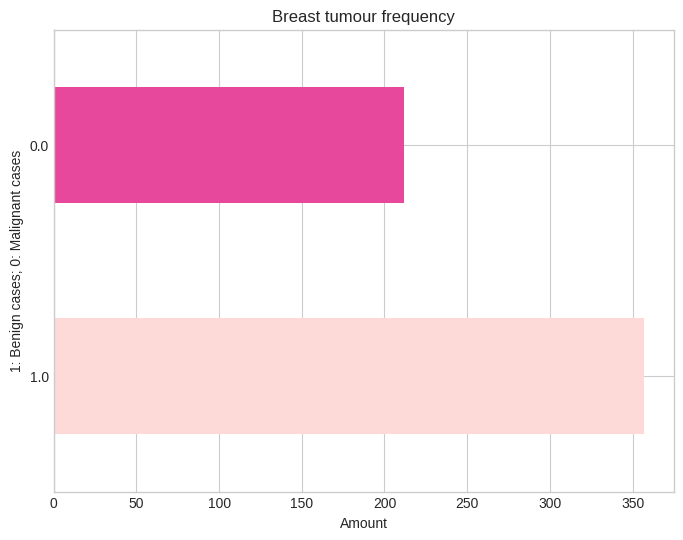

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
cancer_df.target.value_counts().plot(kind = 'barh',
                                    color = (colours[0], colours[2]),
                                    ax = ax)

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Breast tumour frequency')
plt.xlabel('Amount')
plt.ylabel('1: Benign cases; 0: Malignant cases');

Since the values are not too close to each other, this suggests that the`target` is no too unbalanced. We can plot some features and observe somehow how our features are related: For example, we plot the mean radius and smoothness of the tumours in both cases:

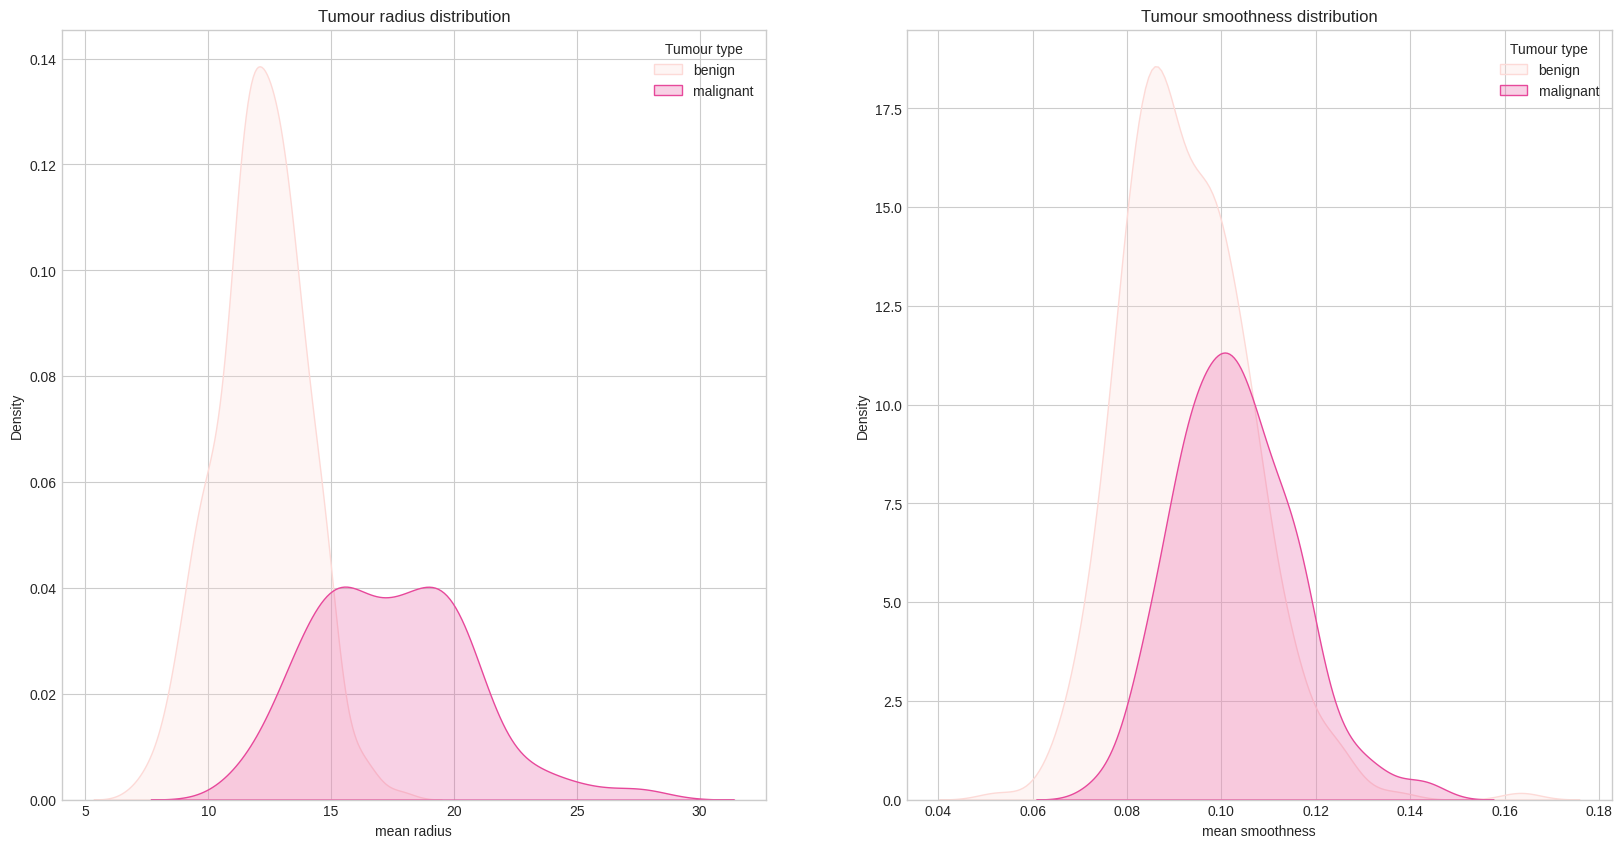

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

# plot
sns.kdeplot(data = cancer_df,
                x = 'mean radius',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax1,
                legend = False)

sns.kdeplot(data = cancer_df,
                x = 'mean smoothness',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax2)

# plot infos:
ax1.set_title('Tumour radius distribution')
ax2.set_title('Tumour smoothness distribution')
ax1.legend(title='Tumour type', labels=['benign', 'malignant'])
ax2.legend(title='Tumour type', labels=['benign', 'malignant']);

We can see that benign tumours tend to be smaller in radius than the malignant ones. We can alos observe how some features overlap, which would make it hard to diagnose them:

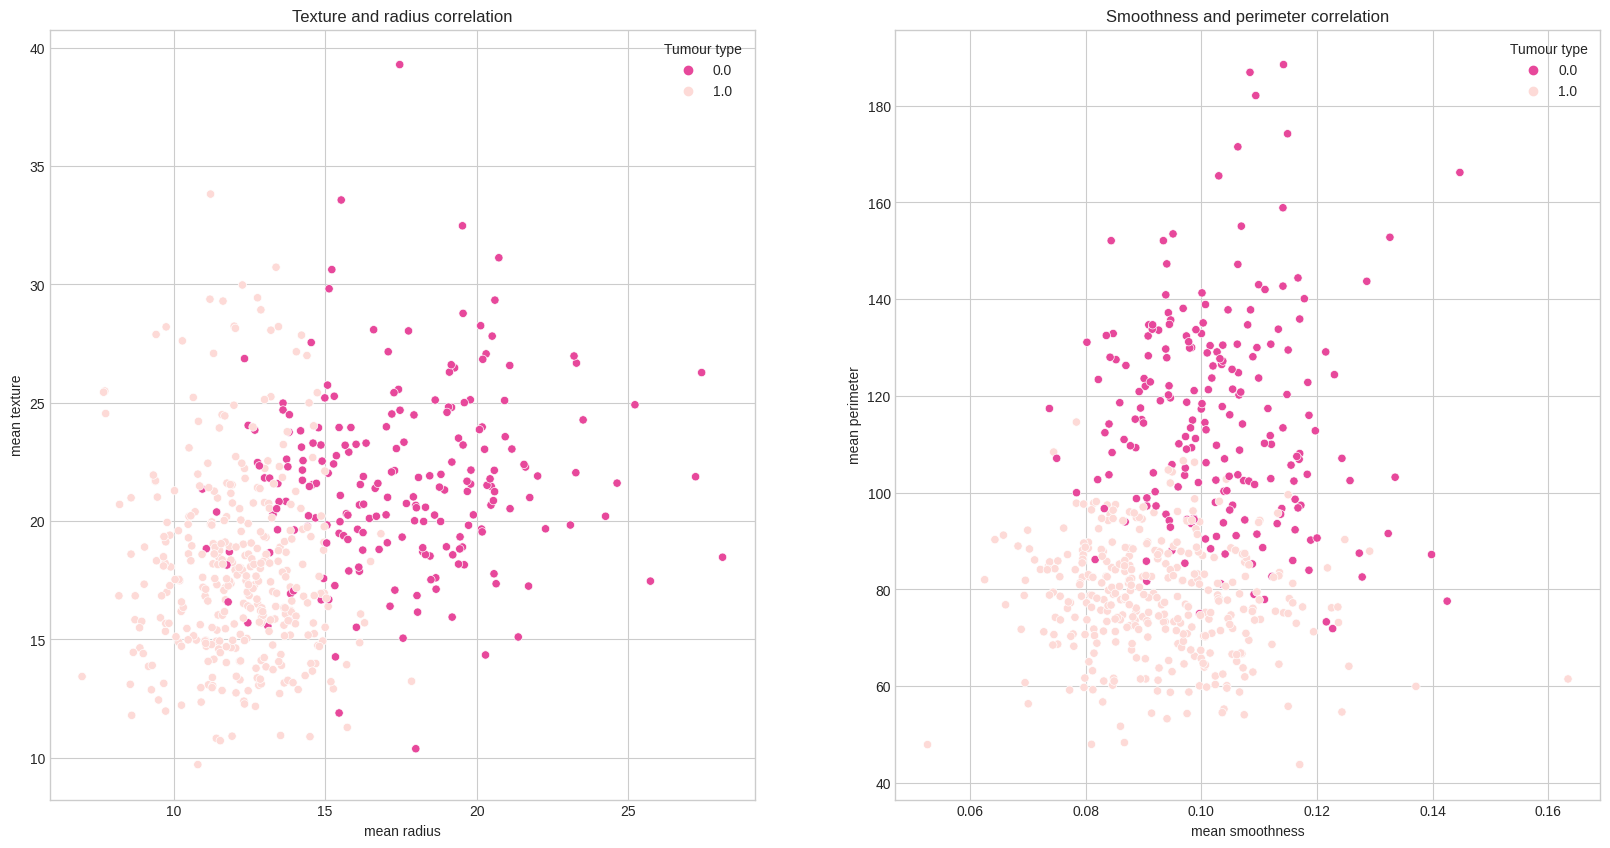

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

# plot
sns.scatterplot(data = cancer_df,
                x = 'mean radius',
                y = 'mean texture',
                hue = 'target', 
                palette = (colours[2], colours[0]),
                ax = ax1,
                legend = True)

sns.scatterplot(data = cancer_df,
                x = 'mean smoothness',
                y = 'mean perimeter',
                hue = 'target', 
                palette = (colours[2], colours[0]),
                ax = ax2,
                legend = True)

# plot infos:
ax1.set_title('Texture and radius correlation')
ax2.set_title('Smoothness and perimeter correlation')
ax1.legend(title='Tumour type')
ax2.legend(title='Tumour type');

### Correlation matrix: 

We also explore some possible correlation between independent variables, as this may suggest which independent variables may or may not have an impact on our target variable:

In [ ]:
corr_mtrx = cancer_df.corr()

Since correlation matrices are symmetrical, half of it suffices to analyze correctly the data, hence we triangulate it as follow:

In [ ]:
#Mask the upper triangle: 
mask = np.triu(np.ones(corr_mtrx.shape),0)

and we plot a heatmap using `seaborn` that would graphically highlits our correlations:

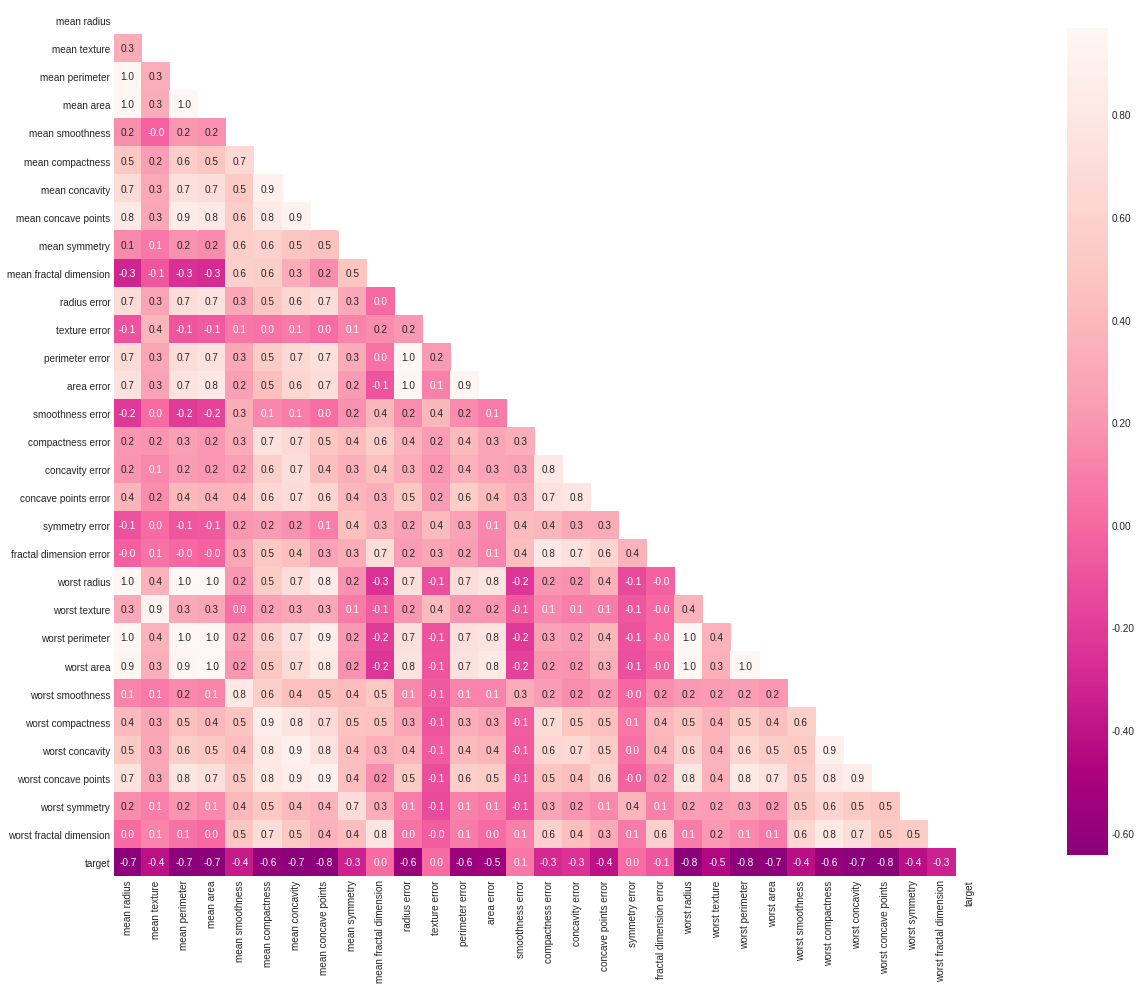

In [ ]:
fig, ax = plt.subplots(figsize=(30,16))

# plot confusion matrix
ax = sns.heatmap(
    data = corr_mtrx,
    cmap="RdPu_r",
    center = 0,
    robust=True,
    annot = True,
    fmt = '.1f',
    square = True,
    cbar_kws={
            'shrink': .95,
            'format': '%.2f'
        },
    mask=mask)

A higher positive (resp. negative) value means a potential positive (resp. negative) correlation. 

# 2) Data modelling:

Here we will try to build a model and train in order to predict our `target` variable:

## Set up:

For higher accuracy, we will normalize our data. We use min-max normalization : $$ X_n = \frac{X - X_{min}}{X_{max} - X_{min}}$$ 
and standard scaling : $$ X_{sc} = \frac{X - \operatorname{mean}(X)}{\operatorname{std}{X}} $$

In [ ]:
X = cancer_df.drop('target', axis = 1)
y = cancer_df['target']

We split our data into train and test sets:

In [ ]:
np.random.seed(1729)

# Non-normalized datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Normalized datasets
Xn_train = ( X_train - X_train.min() ) / ((X_train - X_train.min()).max())
Xn_test = ( X_test - X_test.min() ) / ((X_test - X_test.min()).max())

# Scaled datasets
scaler = StandardScaler()
Xsc_train = scaler.fit_transform(X_train)
Xsc_test = scaler.fit_transform(X_test)

# Using PCA
pca = PCA(n_components=3)
Xpca_train = pca.fit_transform(Xsc_train)
Xpca_test = pca.fit_transform(Xsc_test)

Our model is about **classification**, where we are predicting a **categorical variable** : `target`. It has **labeled data** of less than 100.000 samples. Using Scikit Learn's [documentation](https://scikit-learn.org/stable/user_guide.html) we opt for the following models:

* Log Reg : [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* K-Nearest Neighbors : [KNeighborsClassifier](https://scikit-learn.org/stable/modules/neighbors.html)
* SVC : [Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* Gaussian NB : [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In order to see which model performs the best, we proceed as follow:

#### 1. Instantiate each model in a dictionary:

In [ ]:
models = {'logReg': LogisticRegression(max_iter = 5000),
          'KNN': KNeighborsClassifier(),
          'SVC': SVC(),
          'GNB': GaussianNB()}

#### 2. Create function to fit and score models:

In [ ]:
def mod_score(models, X_train, X_test, y_train, y_test):
    '''
    Takes a dictionarry of models and fits each on a training set and returns its score on a test set
    '''
    # Fix randomness
    np.random.seed(1729)
    # empty dict to append
    results = {}
    
    for name, model in models.items() :
        model.fit(X_train, y_train)
        results[name] = model.score(X_test, y_test)

    return results

#### 3. View the results:

In [ ]:
mod_scores = mod_score(models, X_train, X_test, y_train, y_test)

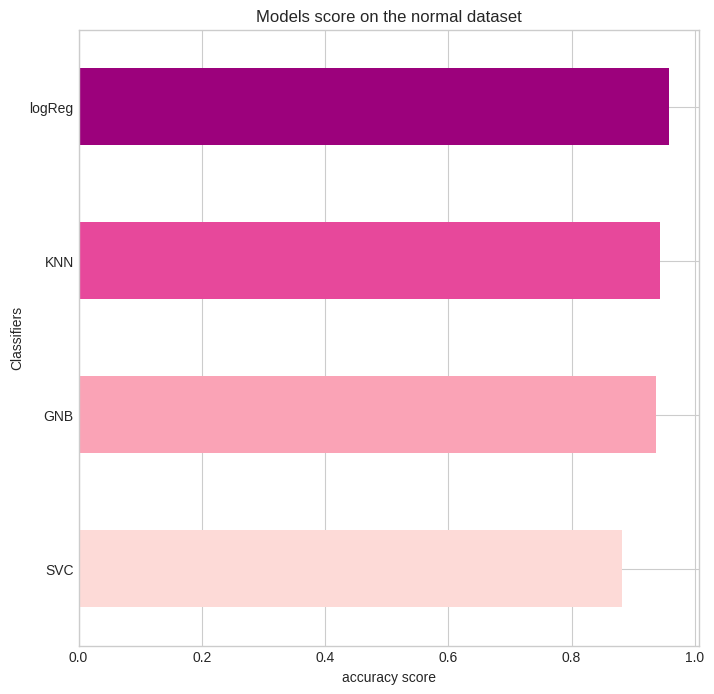

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

# plot 
pd.DataFrame(mod_scores.values(), 
             mod_scores.keys(), 
             columns=['accuracy']
            ).reset_index().sort_values(by = 'accuracy').plot(x = 'index',
                                 y = 'accuracy', 
                                 ax = ax,
                                 kind = 'barh',
                                 color = colours,
                                 legend = False)

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Models score on the normal dataset')
plt.ylabel('Classifiers')
plt.xlabel('accuracy score')

plt.xticks(rotation = 0);

## Hyperparameters tuning:

For lack of data samples (only 569) we cannot use a validation set to tune our models, we use *k-cross-validation* instead. 

### We can use `RandomizedSearchCV` or `GridSearchCV`:

Here, at least with the modelling that we have been doing, they both somehow come up with the same suggested tuning.

In [ ]:
# logReg hyperparameters
logReg_grid = { 'C': np.logspace(-4, 4, 50),
           'solver': ['liblinear'],
         'penalty' : ['l1', 'l2']}

# SVC hyperparameters
lSVC_grid = [{'C': [1, 10, 100, 1000], 
             'kernel': ['linear']}, 
            {'C': [0.1, 1, 10, 100], 
            'gamma': [1, 0.1, 0.01, 0.001], 
            'kernel': ['rbf']}] 

# KNN hyperparameters
KNN_grid = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50],
              'p' : [1,2]}

# GaussianNB hyperparameters
GNB_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

#### 1- KNN:

In [ ]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for KNN with non-norm data:
KNN_cstm = RandomizedSearchCV(KNeighborsClassifier(),
                              param_distributions = KNN_grid,
                              cv=5,
                              verbose=True
                              ).fit(X_train, y_train)

# hyperparameter search for KNN with norm data:
KNN_cstm_n = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions = KNN_grid,
                                cv=5,
                                verbose=True
                                ).fit(Xn_train, y_train)

# hyperparameter search for KNN with scaled data:
KNN_cstm_sc = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions = KNN_grid,
                                cv=5,
                                verbose=True
                                ).fit(Xsc_train, y_train)

# hyperparameter search for KNN with scaled data+pca:
KNN_cstm_pca = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions = KNN_grid,
                                cv=5,
                                verbose=True
                                ).fit(Xpca_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
KNN_cstm.best_params_, KNN_cstm_n.best_params_, KNN_cstm_sc.best_params_, KNN_cstm_pca.best_params_

({'weights': 'uniform',
  'p': 2,
  'n_neighbors': 10,
  'leaf_size': 20,
  'algorithm': 'ball_tree'},
 {'weights': 'distance',
  'p': 2,
  'n_neighbors': 5,
  'leaf_size': 10,
  'algorithm': 'brute'},
 {'weights': 'uniform',
  'p': 1,
  'n_neighbors': 5,
  'leaf_size': 50,
  'algorithm': 'brute'},
 {'weights': 'uniform',
  'p': 2,
  'n_neighbors': 10,
  'leaf_size': 30,
  'algorithm': 'kd_tree'})

#### 2- SVC:

In [ ]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for SVC with non-norm data:
SVC_cstm = RandomizedSearchCV(SVC(),
                              param_distributions = SVC_grid,
                              cv=5,
                              verbose=True,
                              refit = True
                              ).fit(X_train, y_train)

# hyperparameter search for SVC with norm data:
SVC_cstm_n = RandomizedSearchCV(SVC(),
                                param_distributions = SVC_grid,
                                cv=5,
                                verbose=True,
                                refit = True
                                ).fit(Xn_train, y_train)

# hyperparameter search for SVC with scaled data:
SVC_cstm_sc = RandomizedSearchCV(SVC(),
                                param_distributions = SVC_grid,
                                cv=5,
                                verbose=True,
                                 refit = True
                                ).fit(Xsc_train, y_train)

# hyperparameter search for SVC with scaled data+pca:
SVC_cstm_pca = RandomizedSearchCV(SVC(),
                                param_distributions = SVC_grid,
                                cv=5,
                                verbose=True,
                                 refit = True
                                ).fit(Xpca_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
SVC_cstm.best_params_, SVC_cstm_n.best_params_, SVC_cstm_sc.best_params_, SVC_cstm_pca.best_params_

({'kernel': 'linear', 'C': 100},
 {'kernel': 'rbf', 'gamma': 0.1, 'C': 100},
 {'kernel': 'linear', 'C': 10},
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10})

#### 3) logReg: 

In [ ]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for logReg with non-norm data:
logReg_cstm = RandomizedSearchCV(LogisticRegression(max_iter = 800),
                              param_distributions = logReg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(X_train, y_train)

# hyperparameter search for logReg with norm data:
logReg_cstm_n = RandomizedSearchCV(LogisticRegression(max_iter = 800),
                                param_distributions = logReg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xn_train, y_train)

# hyperparameter search for logReg with scaled data:
logReg_cstm_sc = RandomizedSearchCV(LogisticRegression(max_iter = 800),
                                param_distributions = logReg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xsc_train, y_train)

# hyperparameter search for logReg with scaled data+pca:
logReg_cstm_pca = RandomizedSearchCV(LogisticRegression(max_iter = 800),
                                param_distributions = logReg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xpca_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
logReg_cstm.best_params_, logReg_cstm_n.best_params_, logReg_cstm_sc.best_params_, logReg_cstm_pca.best_params_

({'solver': 'liblinear', 'penalty': 'l1', 'C': 51.79474679231202},
 {'solver': 'liblinear', 'penalty': 'l1', 'C': 5.428675439323859},
 {'solver': 'liblinear', 'penalty': 'l2', 'C': 5.428675439323859},
 {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.019306977288832496})

In [ ]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for GaussianNB with non-norm data:
GNB_cstm = RandomizedSearchCV(GaussianNB(),
                              param_distributions = GNB_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(X_train, y_train)

# hyperparameter search for GaussianNB with norm data:
GNB_cstm_n = RandomizedSearchCV(GaussianNB(),
                                param_distributions = GNB_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xn_train, y_train)

# hyperparameter search for GaussianNB with scaled data:
GNB_cstm_sc = RandomizedSearchCV(GaussianNB(),
                                param_distributions = GNB_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xsc_train, y_train)

# hyperparameter search for GaussianNB with scaled data+pca:
GNB_cstm_pca = RandomizedSearchCV(GaussianNB(),
                                param_distributions = GNB_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xpca_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Finally, we make a comparison of the performences:

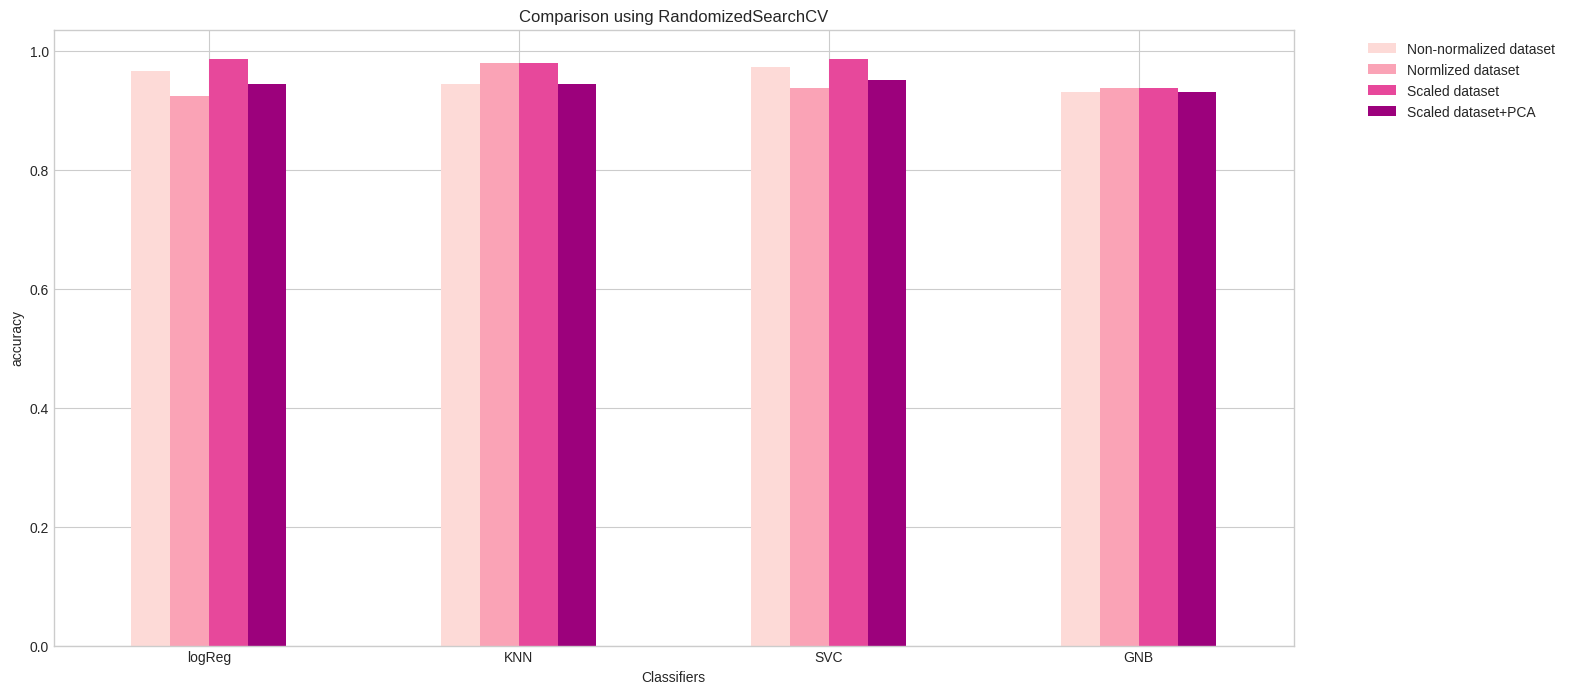

In [ ]:
score_comp = pd.DataFrame(index = models.keys())
score_comp['accuracy (non-norm)'] = [logReg_cstm.score(X_test, y_test), KNN_cstm.score(X_test, y_test), SVC_cstm.score(X_test, y_test), GNB_cstm.score(X_test, y_test)]
score_comp['accuracy (norm)'] = [logReg_cstm_n.score(Xn_test, y_test), KNN_cstm_n.score(Xn_test, y_test), SVC_cstm_n.score(Xn_test, y_test), GNB_cstm_n.score(Xn_test, y_test)]
score_comp['accuracy (scaled)'] = [logReg_cstm_sc.score(Xsc_test, y_test), KNN_cstm_sc.score(Xsc_test, y_test), SVC_cstm_sc.score(Xsc_test, y_test), GNB_cstm_sc.score(Xsc_test, y_test)]
score_comp['accuracy (scaled+pca)'] = [logReg_cstm_pca.score(Xpca_test, y_test), KNN_cstm_pca.score(Xpca_test, y_test), SVC_cstm_pca.score(Xpca_test, y_test), GNB_cstm_pca.score(Xpca_test, y_test)]

fig, ax = plt.subplots(figsize = (16,8))

#plot:
score_comp.plot.bar(color = colours, ax = ax, legend=  False)

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Comparison using RandomizedSearchCV')
plt.xlabel('Classifiers')
plt.ylabel('accuracy')
plt.legend(['Non-normalized dataset', 'Normlized dataset', 'Scaled dataset', 'Scaled dataset+PCA'], bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation = 0);

## 3) Model evaluation:

Now we want to evaluate our model using the SVC classifier that we have been tuning according to more metrics than just `accuracy`:

In [ ]:
SVC_cstm_sc.best_params_

{'kernel': 'linear', 'C': 10}

In [ ]:
# Instantiate best model with best hyperparameters
clf = SVC(C = 10, kernel = 'linear', probability=True).fit(Xsc_train, y_train);

# Make predictions
y_preds = clf.predict(Xsc_test)

### [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/):

It is somehow a visual way to show where our model made nailed its predictions and where it failed:

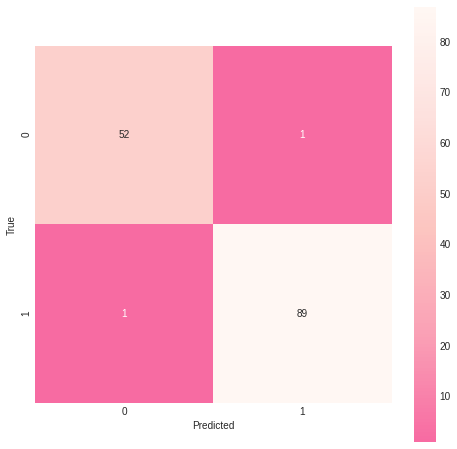

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_preds)

conf_mtrx_plot(conf_mtrx);

### ROC Curve and AUC Scores

We basically compare the true positive rate to the false positive rate, i.e.
a malignant diagnosis of a tumour, that is actually benign vs a benign diagnosis of a tumour,
that is actually malignant (this last case is more dangerous)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(Xsc_test)[:, 1])
print(fpr.shape, tpr.shape) 

(6,) (6,)


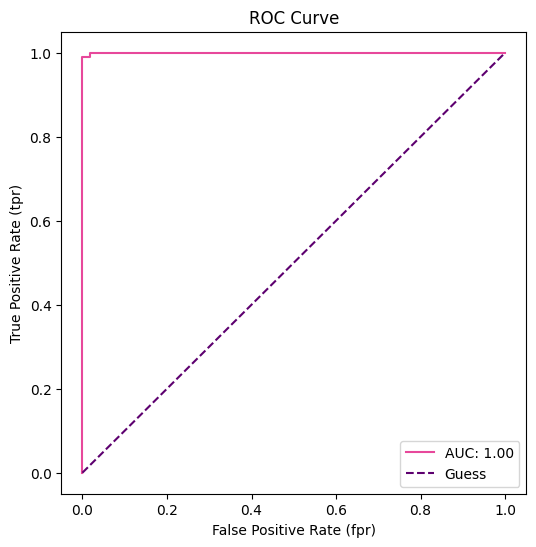

In [ ]:
ROC_cur_plot(clf, Xsc_test, y_test)

### [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Now let's have a look on the main classification metrics:

In [ ]:
# Create a classification report using the classification_report function
report = classification_report(y_test, y_preds, output_dict=True)

pd.DataFrame(report).T

,precision,recall,f1-score,support
0.0,0.981132,0.981132,0.981132,53.000000
1.0,0.988889,0.988889,0.988889,90.000000
accuracy,0.986014,0.986014,0.986014,0.986014
macro avg,0.985010,0.985010,0.985010,143.000000
weighted avg,0.986014,0.986014,0.986014,143.000000


We evaluate our model on all these metrics:

In [ ]:
dft_eval = eval_mod(clf, Xsc_test, y_test)

accuracy : 98.60%
precision : 98.89%
recall : 98.89%
f1 score : 98.89%


Finally, we use `cross_val_score()` to *Cross-validate* our metrics and have more accurate and solid results:

In [ ]:
# cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf, X, y, scoring = "accuracy", cv = 5))

# cross-validated precision
cv_prec = np.mean(cross_val_score(clf, X, y, scoring = "precision", cv = 5))

# cross-validated recall
cv_recall = np.mean(cross_val_score(clf, X, y, scoring = "recall", cv = 5))

# cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf, X, y, scoring = "f1", cv = 5))

In [ ]:
cv_eval = {'accuracy' : cv_acc, 
           'precision' : cv_prec, 
           'recall' : cv_recall, 
           'f1 score' : cv_f1 }

for v,k in cv_eval.items():
    print(v,': {:.2f}%'.format(k * 100))

accuracy : 95.26%
precision : 95.89%
recall : 96.64%
f1 score : 96.24%


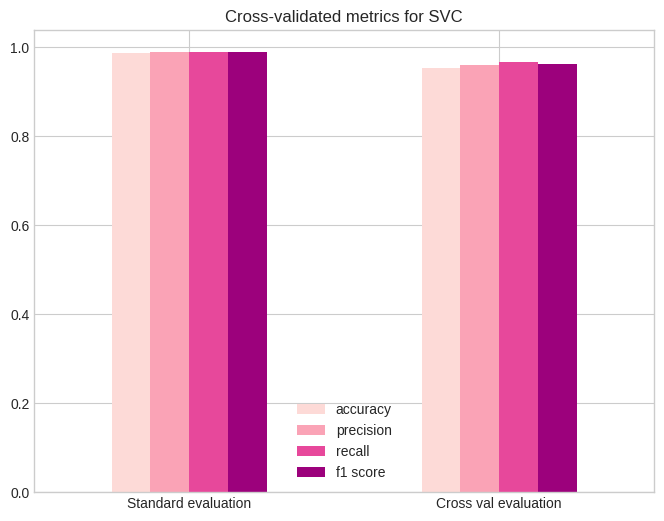

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

pd.DataFrame([dft_eval, cv_eval], index = ['Standard evaluation', 'Cross val evaluation']).plot(kind = 'bar',
                                      ax = ax, color = colours);


# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Cross-validated metrics for SVC')
plt.xticks(rotation = 0);

## 4) Feature importance:

Finally, we will find which features were important in order to predict malignant turmours from benigns using the results we had, or similarily: 

**Which charateristics contribute the most to SVC predicting whether a tumour is malignant or not?**


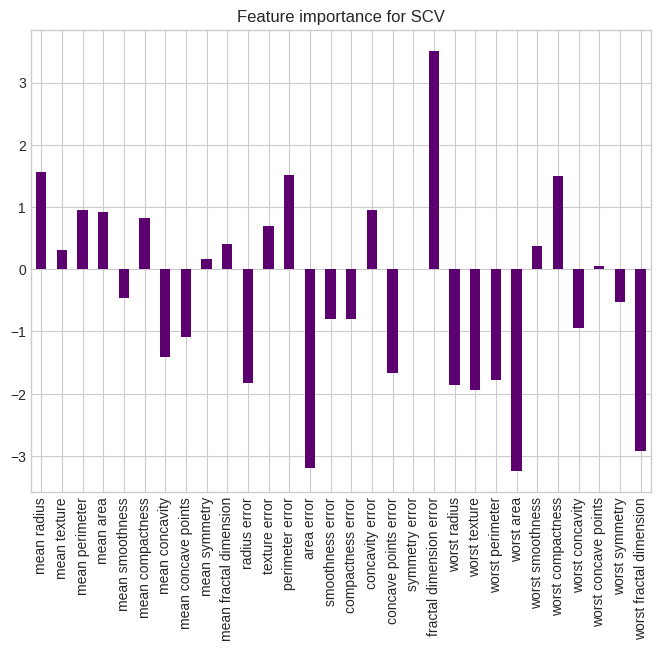

In [ ]:
#get the coefficients from SCV
clf.coef_

# Match features to columns of our df
features_dict = dict(zip(cancer_df.columns, list(clf.coef_[0])))

#set figure
fig, ax = plt.subplots(figsize = (8,6))

pd.DataFrame(features_dict.values(), index = features_dict.keys()).plot(kind = 'bar',
                                      ax = ax, color = colours[4], legend = False);

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Feature importance for SCV');

Our model is learning and figuring out some patterns to guess malignant and bnign cases: 

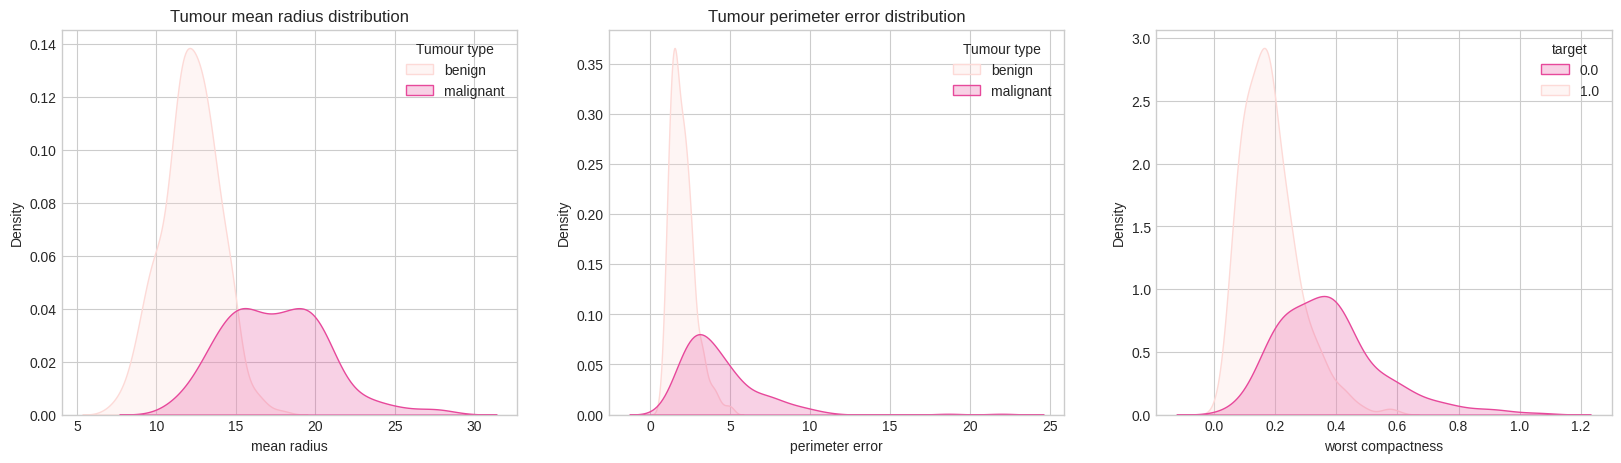

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

# plot
sns.kdeplot(data = cancer_df,
                x = 'mean radius',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax1,
                legend = False)

sns.kdeplot(data = cancer_df,
                x = 'perimeter error',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax2)


sns.kdeplot(data = cancer_df,
                x = 'worst compactness',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax3)

# plot infos:
ax1.set_title('Tumour mean radius distribution')
ax2.set_title('Tumour perimeter error distribution')
ax1.legend(title='Tumour type', labels=['benign', 'malignant'])
ax2.legend(title='Tumour type', labels=['benign', 'malignant']);

We see for example that it relies more on the standard deviation of the fractal dimension of a tumour to eliminate the malignant cases :

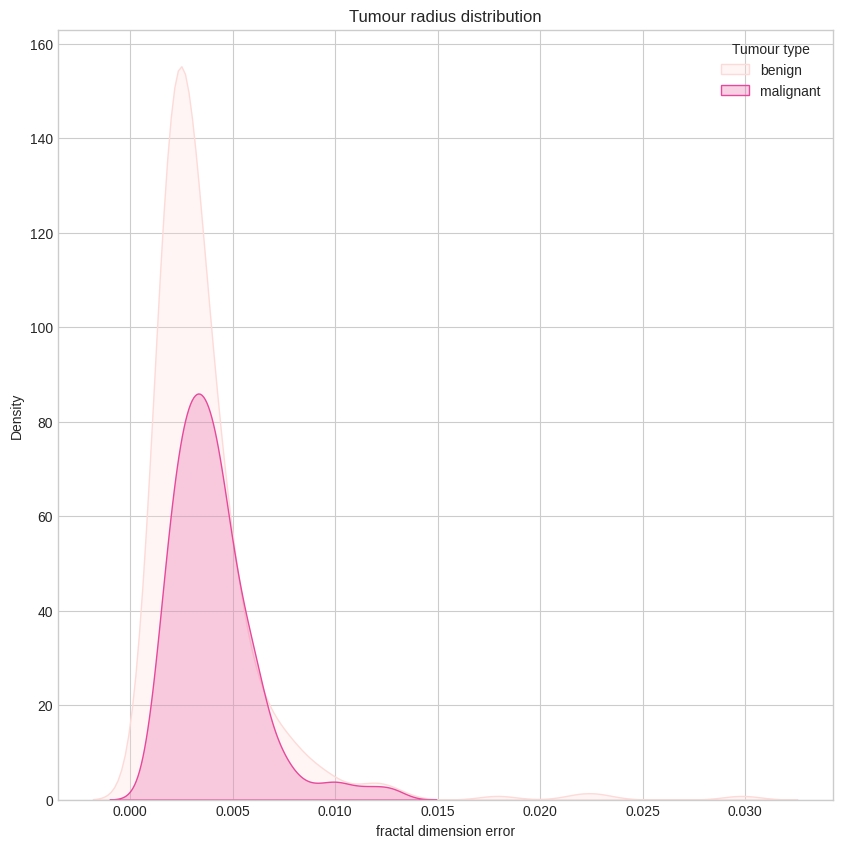

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

# plot
sns.kdeplot(data = cancer_df,
                x = 'fractal dimension error',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax,
                legend = False)

# plot infos:
ax.set_title('Tumour radius distribution')
ax.legend(title='Tumour type', labels=['benign', 'malignant']);

and, on the other hand, relies more on the largest area as well as the standard deviation of the area to detect malignant tumours.

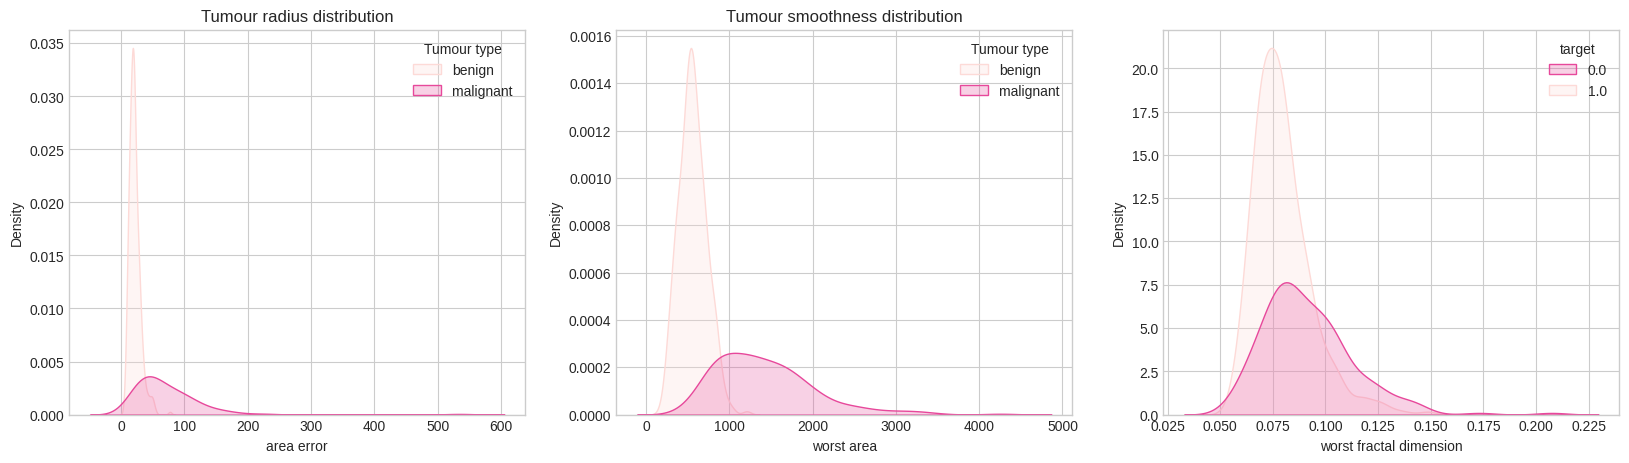

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

# plot
sns.kdeplot(data = cancer_df,
                x = 'area error',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax1,
                legend = False)

sns.kdeplot(data = cancer_df,
                x = 'worst area',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax2)

sns.kdeplot(data = cancer_df,
                x = 'worst fractal dimension',  
                hue = 'target', 
                palette = (colours[2], colours[0]),
                fill=True,
                ax = ax3)

# plot infos:
ax1.set_title('Tumour radius distribution')
ax2.set_title('Tumour smoothness distribution')
ax1.legend(title='Tumour type', labels=['benign', 'malignant'])
ax2.legend(title='Tumour type', labels=['benign', 'malignant']);

## 5) Conclusion

We analysed our sample and trained a model that reached up to 98.60%% on score accuracy and 95.26% on cross-validated accuracy. As our model here is pretty much balanced we would want to aim for a very high **accuracy** (of at least > 95%). However, we would still like to aim for a higher recall, and thus reducing the values of false negatives (which in this case is ) from 1 to 0.